# Mushroom Classifier 

In [1]:
import pandas as pd
from math import e
import numpy as np
import scipy.stats as s
import random
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,LabelEncoder,RobustScaler,MinMaxScaler
from time import time

In [2]:
data = pd.read_csv('mushrooms.csv')
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
encoder = LabelEncoder()
for col in data.columns:
    data[col] = encoder.fit_transform(data[col])
    
data.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [5]:
def sigmoid(z):
    return 1/(1 + e**(-z))

def logistic_regression(X,Y,Total_Steps,learning_rate):
    
    #To add X0 to train data i.e theta0(intercept)
    intercept = np.ones((X.shape[0],1))
    X = np.concatenate((intercept,X),axis = 1)
    X = np.array(X,dtype=float)
    
    #Taking coefficients(thetas)
    theta = np.random.normal(0,1,X.shape[1])
    theta = np.array(theta,dtype=float)

    
    
    for i in range(Total_Steps):
        z = np.dot(X,theta)
        z = np.array(z,dtype=float)
        h = sigmoid(z)
        gradient = np.dot(X.T,Y - h)
        theta = theta + learning_rate*gradient
        
    return theta


#### Seperating P and E Class 

In [6]:
PData = data[data['class']== 1]
EData = data[data['class']== 0]

In [7]:
print(PData.shape,EData.shape)

(3916, 23) (4208, 23)


In [8]:
sc = StandardScaler()

In [9]:
splitindex = 3046

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


(6092, 22)


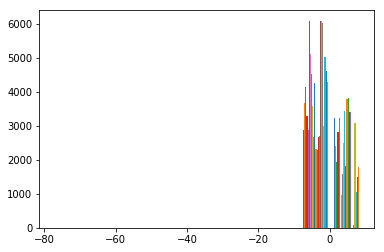

(6092,)


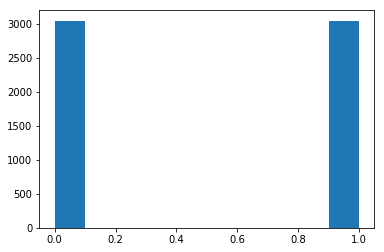

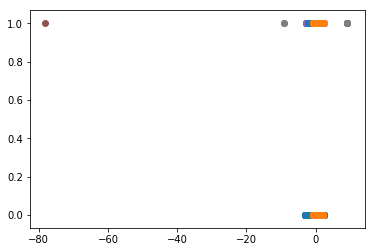

In [10]:
PxTrainData = np.array(PData.iloc[:splitindex,1:])
ExTrainData = np.array(EData.iloc[:splitindex,1:])
X_TrainData = np.concatenate((PxTrainData,ExTrainData),axis = 0)
X_TrainData = sc.fit_transform(X_TrainData)
print(X_TrainData.shape)
plt.hist(X_TrainData)
plt.show()

PyTrainData = np.array(PData.iloc[:splitindex,0])
EyTrainData = np.array(EData.iloc[:splitindex,0])
Y_TrainData = np.concatenate((PyTrainData,EyTrainData),axis = 0)
print(Y_TrainData.shape)
plt.hist(Y_TrainData)
plt.show()

for i in X_TrainData.T:
    plt.scatter(i,Y_TrainData)
plt.show()

In [11]:
PTestData = PData[splitindex:]
ETestData = EData[splitindex:]
PTestData.shape

(870, 23)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


(2032, 22)


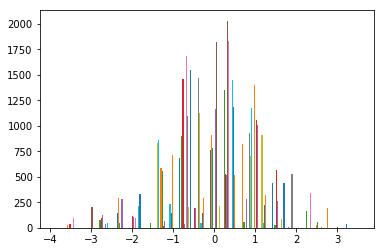

(2032,)


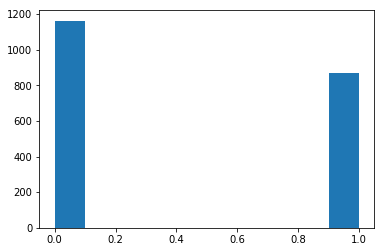

In [12]:
PxTestData = np.array(PTestData.iloc[:splitindex,1:])
ExTestData = np.array(ETestData.iloc[:splitindex,1:])
X_TestData = np.concatenate((PxTestData,ExTestData),axis = 0)
X_TestData = sc.fit_transform(X_TestData)
print(X_TestData.shape)
plt.hist(X_TestData)
plt.show()

PyTestData = np.array(PTestData.iloc[:splitindex,0])
EyTestData = np.array(ETestData.iloc[:splitindex,0])
Y_TestData = np.concatenate((PyTestData,EyTestData),axis = 0)
print(Y_TestData.shape)
plt.hist(Y_TestData)
plt.show()

##  Training The Model

In [13]:
start = time()
Total_steps = 100000
alpha = 0.1

theta = logistic_regression(X_TrainData,Y_TrainData,Total_steps,alpha)
print("Time take in training: ",time() - start)

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in power
  


Time take in training:  48.57426309585571


In [14]:
theta

array([ 1.32993713e+02, -2.92407422e-02,  6.47302496e+01, -1.31964855e-01,
       -1.77680052e+01, -3.75538692e+01, -7.20731828e+00, -2.12700197e+02,
        2.45928884e+02,  1.47842136e-02, -7.80002966e+01, -3.19578092e+02,
       -1.25707446e+02, -8.01197911e+01,  7.70415318e-01,  7.07189061e-01,
       -3.63349687e-01,  4.10850424e-01, -3.04682242e+00, -3.93185980e+01,
       -3.62885559e+01, -3.39657009e+01,  1.88640522e+00])

In [15]:
intercept = np.ones((X_TestData.shape[0],1))
XTest = np.concatenate((intercept,X_TestData),axis = 1)
XTest = np.array(XTest,dtype=float)

test_z = np.dot(XTest,theta)
predictions = sigmoid(test_z)
predictions = np.around(predictions)
predictions

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in power
  


array([1., 1., 1., ..., 1., 1., 1.])

In [16]:
for i in range(X_TestData.shape[0]):
    print(predictions[i],Y_TestData[i])

1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
0.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
0.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 

1.0 0
1.0 0
1.0 0
0.0 0
1.0 0
1.0 0
1.0 0
1.0 0
0.0 0
1.0 0
1.0 0
1.0 0
1.0 0
1.0 0
1.0 0
0.0 0
1.0 0
1.0 0
1.0 0
1.0 0
1.0 0
1.0 0
1.0 0
0.0 0
1.0 0
1.0 0
1.0 0
1.0 0
1.0 0
1.0 0
1.0 0
1.0 0
1.0 0
1.0 0
1.0 0
0.0 0
0.0 0
1.0 0
0.0 0
1.0 0
1.0 0
1.0 0
1.0 0
1.0 0
1.0 0
1.0 0
1.0 0
1.0 0
1.0 0
1.0 0
1.0 0
1.0 0
1.0 0
1.0 0
1.0 0
1.0 0
1.0 0
1.0 0
1.0 0
1.0 0
1.0 0
1.0 0
0.0 0
1.0 0
1.0 0
1.0 0
1.0 0
1.0 0
1.0 0
1.0 0
1.0 0
1.0 0
1.0 0
1.0 0
0.0 0
1.0 0
1.0 0
1.0 0
1.0 0
1.0 0
1.0 0
1.0 0
1.0 0
1.0 0
1.0 0
1.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
1.0 0
0.0 0
0.0 0
0.0 0
1.0 0
1.0 0
0.0 0
0.0 0
0.0 0
0.0 0
1.0 0
0.0 0
0.0 0
1.0 0
0.0 0
0.0 0
0.0 0
1.0 0
0.0 0
0.0 0
1.0 0
0.0 0
0.0 0
1.0 0
0.0 0
1.0 0
0.0 0
0.0 0
1.0 0
0.0 0
0.0 0
0.0 0
1.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
1.0 0
0.0 0
1.0 0
0.0 0
0.0 0
1.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
1.0 0
1.0 0
0.0 0
1.0 0
0.0 0
1.0 0
1.0 0
0.0 

In [17]:
accuracy = predictions[Y_TestData == predictions].shape[0]/predictions.shape[0]
print(accuracy)

0.7608267716535433
